<a href="https://colab.research.google.com/github/hariehkr/techGig/blob/main/TechGig_MLModels_GrandFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
import pandas as pd # Pandas for data manipulations
import numpy as np  # Numpy for the computations
import os
from sklearn.metrics import accuracy_score,classification_report # For metrics
from sklearn.metrics import make_scorer,recall_score,precision_score,f1_score
from sklearn.model_selection import train_test_split             # For train and test splits
from sklearn.model_selection import GridSearchCV                 # For GridSearch and K-fold cross validation
from sklearn.impute import SimpleImputer                         # For Imputation

import matplotlib.pyplot as plt # For visualizations
import seaborn as sns           # For visualizations

import warnings                   # For warnings
warnings.filterwarnings('ignore') # Supress/Ignore warnings

### Function for training the model

In [2]:
# Function for training the model
def fn_train_model(model, 
                X_train, 
                y_train, 
                parameters = None, 
                k = 1):
    if parameters == None:
        model.fit(X_train, y_train) 
    else:
        model_cv = GridSearchCV(model, 
                                param_grid = parameters, 
                                cv = k)
        
        model_cv.fit(X_train, y_train)
        model = model_cv.best_estimator_
        
    return model

In [3]:
# Function to generate classification metrics
def fn_compute_model_metrics(model, model_name, 
                       X_train, y_train, X_test, y_test,
                       parameters = None, k = 1):
    """
    accuracy_score, precision_score, recall_score,f1_score     
    
    """    
    if parameters == None:
        model.fit(X_train, y_train) 
    else:
        model_cv = GridSearchCV(model, 
                                param_grid = parameters, 
                                cv = k)
        
        model_cv.fit(X_train, y_train)
        model = model_cv.best_estimator_    
  
    metrics = {}
    # train metrics
    train_predictions = model.predict(X_train)
    metrics['train_accuracy']    = round(accuracy_score(y_train, train_predictions),4)
    metrics['train_precision']   = round(precision_score(y_train, train_predictions),4)
    metrics['train_recall']      = round(recall_score(y_train, train_predictions),4)
    metrics['train_f1_score']    = round(f1_score(y_train, train_predictions),4)
    #metrics['train_model_score'] = round(base_lrc.score(X_train, y_train),4)
    # test metrics
    test_predictions  = model.predict(X_test)
    metrics['test_accuracy']     = round(accuracy_score(y_test, test_predictions),4)
    metrics['test_precision']    = round(precision_score(y_test, test_predictions),4)
    metrics['test_recall']       = round(recall_score(y_test, test_predictions),4)
    metrics['test_f1_score']     = round(f1_score(y_test, test_predictions),4)
    #metrics['test_model_score']  = round(base_lrc.score(X_test, y_test),4)
   
    return pd.Series(metrics, name = model_name)

### # Function to generate classification metrics

In [4]:
# Function to generate classification metrics
def fn_compute_metrics(model,
                       model_name,
                       train_data, 
                       train_actuals,
                       test_data,
                       test_actuals):
    """
    accuracy_score, precision_score, recall_score,f1_score 
    
    
    """
    metrics = {}
    # train metrics
    train_predictions = model.predict(train_data)
    metrics['train_accuracy']    = accuracy_score(train_actuals, train_predictions)
    metrics['train_precision']   = precision_score(train_actuals, train_predictions)
    metrics['train_recall']      = recall_score(train_actuals, train_predictions)
    metrics['train_f1_score']    = f1_score(train_actuals, train_predictions)

    # test metrics
    test_predictions  = model.predict(test_data)
    metrics['test_accuracy']     = accuracy_score(test_actuals, test_predictions)
    metrics['test_precision']    = precision_score(test_actuals, test_predictions)
    metrics['test_recall']       = recall_score(test_actuals, test_predictions)
    metrics['test_f1_score']     = f1_score(test_actuals, test_predictions)


   
    return pd.Series(metrics, name = model_name)

In [5]:
# Function to generate classification metrics

def fn_compute_metrics_train(model, 
                       data, 
                       actuals):
    
    predictions = model.predict(data)
    print('\nConfusion Matrix :')
    print(confusion_matrix(actuals, predictions) ) 
    
    print('\nReport : ')
    print(classification_report(actuals, predictions))
    
    fe_recall = recall_score(actuals, predictions, average = None)[0]
    print('Recall score :', fe_recall)
    
    return fe_recall

### Train/Validation data reading

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/hariehkr/techGig/main/data/Phising_Training_Dataset.csv')
df.index=df['key']
df.drop('key', inplace=True, axis=1)
print(df.shape)
df.head()

(8955, 31)


,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
key,,,,,,,,,,,,,,,,,,,,,
12344,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
12345,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
12346,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
12347,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
12348,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [9]:
print("Number of duplicate rows: ", df[df.duplicated()].shape[0]," % of rows: ",(df[df.duplicated()].shape[0]*100/df.shape[0])) 

Number of duplicate rows:  3741  % of rows:  41.77554438860972


In [10]:
df_test = pd.read_csv('https://raw.githubusercontent.com/hariehkr/techGig/main/data/Phising_Testing_Dataset.csv')
df_test.index=df_test['key']
df_test.drop('key', inplace=True, axis=1)
print(df_test.shape)
df_test.head(2)

(2100, 30)


,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
key,,,,,,,,,,,,,,,,,,,,,
21338,1,1,1,1,1,1,-1,1,-1,1,...,1,1,1,1,1,1,1,-1,0,1
21339,1,-1,1,1,1,-1,0,-1,1,1,...,1,1,1,-1,-1,0,-1,-1,0,1


In [11]:
print("Number of duplicate rows: ", df_test[df_test.duplicated()].shape[0]," % of rows: ",(df_test[df_test.duplicated()].shape[0]*100/df_test.shape[0])) 

Number of duplicate rows:  409  % of rows:  19.476190476190474


## Identification Dominant Variable by using RandomForestClassifier
Steps: <br>
* Divide data into training and validation subsets
* Convert target variable into categorical
* Build RandomForestClassifier Model
* Feature extraction and remove Dominant Variables

## Divide data into training and validation subsets

In [13]:
# Divide data into training and validation subsets
y = df['Result']
X = df.drop(['Result'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size=0.8, 
                                                    test_size=0.2,
                                                    random_state=0)
print('X_train dimensions: ', X_train.shape)
print('y_train dimensions: ', y_train.shape)
print('X_test dimensions:  ', X_test.shape)
print('y_test dimensions:  ', y_test.shape)

X_train dimensions:  (7164, 30)
y_train dimensions:  (7164,)
X_test dimensions:   (1791, 30)
y_test dimensions:   (1791,)
X_train dimensions:  (7164, 30)
y_train dimensions:  (7164,)
X_test dimensions:   (1791, 30)
y_test dimensions:   (1791,)


 1    5034
-1    3921
Name: Result, dtype: int64

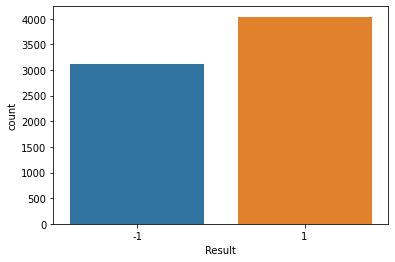

In [15]:
plot_data = y_train.to_frame()
sns.countplot(x = 'Result', data=plot_data)
df.Result.value_counts()

## Convert target variable into categorical
y_train = y_train.astype('category')
y_test = y_test.astype('category')

## Build RandomForestClassifier Model


In [16]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs = -1,
                             random_state = 1)

In [17]:

parameters = {
    "n_estimators" : [150],
    "min_samples_leaf" : [3],
    "max_features": [0.5],
    "class_weight" : ['balanced_subsample']}

final_rfc_model = fn_train_model(rfc,
                          X_train,
                          y_train,
                          parameters, k = 10)


final_rfc_model_metrics = fn_compute_metrics(final_rfc_model,
                                      'Final_rfc_model',
                                       X_train,
                                       y_train,
                                       X_test,
                                       y_test)

print(final_rfc_model)
print(final_rfc_model_metrics)

RandomForestClassifier(class_weight='balanced_subsample', max_features=0.5,
                       min_samples_leaf=3, n_estimators=150, n_jobs=-1,
                       random_state=1)
train_accuracy     0.974456
train_precision    0.980563
train_recall       0.974010
train_f1_score     0.977276
test_accuracy      0.951982
test_precision     0.957661
test_recall        0.955734
test_f1_score      0.956697
Name: Final_rfc_model, dtype: float64


## Feature extraction and remove Dominant Variables

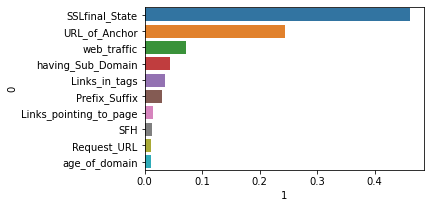

In [19]:
feature_names = list(X_train.columns)
plt.figure(figsize=(5,3))
d = pd.DataFrame([feature_names,final_rfc_model.feature_importances_]).T
d = d.sort_values([1],ascending=False)[0:10]
sns.barplot(d[1],d[0])

In [20]:
d.columns=["variable", "percantage (%)"]
d["percantage (%)"] = d["percantage (%)"] * 100
d

,variable,percantage (%)
7,SSLfinal_State,46.22681
13,URL_of_Anchor,24.352271
25,web_traffic,7.140135
6,having_Sub_Domain,4.334826
14,Links_in_tags,3.526651
5,Prefix_Suffix,3.077751
28,Links_pointing_to_page,1.486912
15,SFH,1.195586
12,Request_URL,1.038621
23,age_of_domain,1.029141


# Dominant Variables
## Remove 
* 'URL_of_Anchor' 
* 'SSLfinal_State'
* 'RightClick' also removed due to zero covariance

In [21]:
dropCol=['URL_of_Anchor', 'SSLfinal_State','RightClick']#,'Favicon', 'Iframe', 'Redirect','port',  
#'double_slash_redirecting', 'on_mouseover',  'Statistical_report','HTTPS_token','having_At_Symbol']
df_train=df.copy()
df_train.drop(columns=dropCol,inplace=True)

In [22]:
print(df_train.shape)
df_train.head()

(8955, 28)


,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,Domain_registeration_length,Favicon,port,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
key,,,,,,,,,,,,,,,,,,,,,
12344,-1,1,1,1,-1,-1,-1,-1,1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
12345,1,1,1,1,1,-1,0,-1,1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
12346,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
12347,1,0,1,1,1,-1,-1,1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
12348,1,0,-1,1,1,-1,1,-1,1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


### Divide data into training and validation subsets

In [23]:
# Divide data into training and validation subsets
y = df_train['Result']
X = df_train.drop(['Result'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size=0.8, 
                                                    test_size=0.2,
                                                    random_state=0)

In [24]:
# Divide data into training and validation subsets
y_train_all= df_train['Result']
X_train_all = df_train.drop(['Result'], axis=1)
y_train_all = y_train_all.astype('category')
print('X_train_all dimensions: ', X_train_all.shape)
print('y_train_all dimensions: ', y_train_all.shape)

X_train_all dimensions:  (8955, 27)
y_train_all dimensions:  (8955,)


In [25]:
y_train = y_train.astype('category')
y_test = y_test.astype('category')

In [ ]:
print('X_train dimensions: ', X_train.shape)
print('y_train dimensions: ', y_train.shape)
print('X_test dimensions:  ', X_test.shape)
print('y_test dimensions:  ', y_test.shape)

X_train dimensions:  (7164, 27)
y_train dimensions:  (7164,)
X_test dimensions:   (1791, 27)
y_test dimensions:   (1791,)


 1    5034
-1    3921
Name: Result, dtype: int64

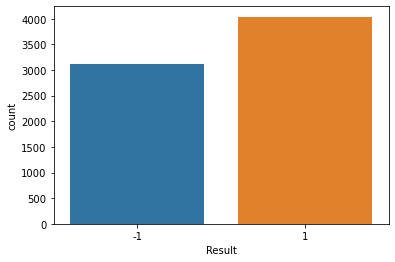

In [ ]:
plot_data = y_train.to_frame()
sns.countplot(x = 'Result', data=plot_data)
df_train.Result.value_counts()

# Models

# LogisticRegression

In [26]:
from sklearn.linear_model import LogisticRegression
base_lrc = LogisticRegression()

In [27]:
%%time
base_metrics = fn_compute_model_metrics(base_lrc, 'base_lrc', 
                       X_train, y_train, X_test, y_test,
                       parameters = None, k = 1)

base_metrics= base_metrics.to_frame()

CPU times: user 165 ms, sys: 161 ms, total: 325 ms
Wall time: 361 ms


In [28]:
%%time
parametersBest = {
    "penalty" : ['l2'],#,'l1', 'l2', 'elasticnet', 'none'],
    "class_weight" : ['balanced'],"n_jobs" : [-1],
    "random_state" : [1]}

para_metrics = fn_compute_model_metrics(base_lrc, 'para_lrc', 
                       X_train, y_train, X_test, y_test,
                       parameters = parametersBest, k = 5)
para_metrics= para_metrics.to_frame()

CPU times: user 203 ms, sys: 606 ms, total: 810 ms
Wall time: 4.01 s


In [29]:
model_metrics=pd.merge(base_metrics,para_metrics,right_index=True,left_index=True)
dfMetrics=model_metrics.copy()

## K-Nearest Neighbours

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier( n_jobs=-1)

In [31]:
%%time
base_metrics = fn_compute_model_metrics(knn, 'base_knn', 
                       X_train, y_train, X_test, y_test,
                       parameters = None, k = 1)
base_metrics= base_metrics.to_frame()

CPU times: user 2.33 s, sys: 526 ms, total: 2.86 s
Wall time: 2.53 s


In [32]:
%%time
parameters = {'weights' :['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'metric':['minkowski'],
              'leaf_size':[10,20,30,40]
             }
cv_model = fn_train_model(knn, X_train, y_train, parameters, k = 5)
cv_model

CPU times: user 30.5 s, sys: 7.8 s, total: 38.3 s
Wall time: 58.7 s


In [33]:
parametersBest = {'weights' :['uniform'],
              'algorithm' : [ 'ball_tree'],
              'metric':['minkowski'],
              'leaf_size':[20]
             } 

In [34]:
%%time
para_metrics = fn_compute_model_metrics(knn, 'para_knn', 
                       X_train, y_train, X_test, y_test,
                       parameters = parametersBest, k = 5)
para_metrics= para_metrics.to_frame()

CPU times: user 4.75 s, sys: 23 ms, total: 4.77 s
Wall time: 6.66 s


In [35]:
model_metrics=pd.merge(base_metrics,para_metrics,right_index=True,left_index=True)

In [36]:
dfMetrics=pd.merge(dfMetrics,model_metrics,right_index=True,left_index=True)
dfMetrics

,base_lrc,para_lrc,base_knn,para_knn
train_accuracy,0.8206,0.8170,0.9178,0.9158
train_precision,0.8443,0.8616,0.9302,0.9240
train_recall,0.8361,0.8047,0.9235,0.9270
train_f1_score,0.8402,0.8322,0.9268,0.9255
test_accuracy,0.8046,0.8018,0.8621,0.8615
test_precision,0.8326,0.8546,0.8769,0.8730
test_recall,0.8109,0.7746,0.8742,0.8783
test_f1_score,0.8216,0.8127,0.8756,0.8756


## Support Vector Machine

In [37]:
from sklearn.svm import LinearSVC
svm=LinearSVC(random_state=123)


In [38]:
%%time
base_metrics = fn_compute_model_metrics(svm, 'base_svm', 
                       X_train, y_train, X_test, y_test,
                       parameters = None, k = 1)
base_metrics= base_metrics.to_frame()

CPU times: user 505 ms, sys: 32.9 ms, total: 538 ms
Wall time: 512 ms


In [39]:
%%time
parameters = {  'penalty': ['l1', 'l2'],
              'loss':['hinge', 'squared_hinge'],
              'C':[0.0001, 0.001, 0.01,1],
             }
cv_model = fn_train_model(svm, X_train, y_train, parameters, k = 5)
cv_model

CPU times: user 3.77 s, sys: 1.99 s, total: 5.76 s
Wall time: 3.76 s


In [40]:
parametersBest = {  'penalty': ['l2'],
              'loss':['hinge'],
              'C':[1],
             }

In [41]:
para_metrics = fn_compute_model_metrics(svm, 'para_svm', 
                       X_train, y_train, X_test, y_test,
                       parameters = parametersBest, k = 5)
para_metrics= para_metrics.to_frame()

In [42]:
model_metrics=pd.merge(base_metrics,para_metrics,right_index=True,left_index=True)

In [43]:
dfMetrics=pd.merge(dfMetrics,model_metrics,right_index=True,left_index=True)
dfMetrics

,base_lrc,para_lrc,base_knn,para_knn,base_svm,para_svm
train_accuracy,0.8206,0.8170,0.9178,0.9158,0.8204,0.8222
train_precision,0.8443,0.8616,0.9302,0.9240,0.8440,0.8456
train_recall,0.8361,0.8047,0.9235,0.9270,0.8359,0.8376
train_f1_score,0.8402,0.8322,0.9268,0.9255,0.8399,0.8416
test_accuracy,0.8046,0.8018,0.8621,0.8615,0.8051,0.8074
test_precision,0.8326,0.8546,0.8769,0.8730,0.8328,0.8356
test_recall,0.8109,0.7746,0.8742,0.8783,0.8119,0.8129
test_f1_score,0.8216,0.8127,0.8756,0.8756,0.8222,0.8241


# DecisionTreeClassifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [45]:
%%time
base_metrics = fn_compute_model_metrics(dtc, 'base_dtc', 
                       X_train, y_train, X_test, y_test,
                        parameters = None, k = 1)
base_metrics= base_metrics.to_frame()

CPU times: user 47.2 ms, sys: 0 ns, total: 47.2 ms
Wall time: 49.2 ms


In [46]:
%%time

parameters = {'max_depth' : range(1,8),  # 7
              'min_impurity_decrease' : [0.001, 0.01,0.05], #3
              'min_samples_split':[3,5,7,9,11], #5
              'criterion':['gini','entropy'] #{"gini", "entropy"}
             } # total models=7*3*5*1=105

cv_model = fn_train_model(dtc,
                          X_train,
                          y_train,parameters, k=5)
cv_model

CPU times: user 10.9 s, sys: 63.8 ms, total: 10.9 s
Wall time: 10.9 s


In [47]:
parametersBest = {'max_depth' :[6],  # 7
              'min_impurity_decrease' : [0.001], #3
              'min_samples_split':[3], #5
              'criterion':['entropy'] #{"gini", "entropy"}
             } # total models=7*3*5*1=105
para_metrics = fn_compute_model_metrics(dtc, 'para_dtc', 
                       X_train, y_train, X_test, y_test,
                       parameters = parametersBest, k = 5)
para_metrics= para_metrics.to_frame()


In [48]:
model_metrics=pd.merge(base_metrics,para_metrics,right_index=True,left_index=True)

In [49]:
dfMetrics=pd.merge(dfMetrics,model_metrics,right_index=True,left_index=True)
dfMetrics

,base_lrc,para_lrc,base_knn,para_knn,base_svm,para_svm,base_dtc,para_dtc
train_accuracy,0.8206,0.8170,0.9178,0.9158,0.8204,0.8222,0.9676,0.8308
train_precision,0.8443,0.8616,0.9302,0.9240,0.8440,0.8456,0.9732,0.8355
train_recall,0.8361,0.8047,0.9235,0.9270,0.8359,0.8376,0.9693,0.8715
train_f1_score,0.8402,0.8322,0.9268,0.9255,0.8399,0.8416,0.9712,0.8532
test_accuracy,0.8046,0.8018,0.8621,0.8615,0.8051,0.8074,0.9028,0.8102
test_precision,0.8326,0.8546,0.8769,0.8730,0.8328,0.8356,0.9051,0.8156
test_recall,0.8109,0.7746,0.8742,0.8783,0.8119,0.8129,0.9215,0.8501
test_f1_score,0.8216,0.8127,0.8756,0.8756,0.8222,0.8241,0.9133,0.8325


##  Bagging Decision Tree (Ensemble Learning I)

In [50]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bg=BaggingClassifier()

In [51]:
%%time
base_metrics = fn_compute_model_metrics(bg, 'bg_dtc', 
                       X_train, y_train, X_test, y_test,
                        parameters = None, k = 1)
base_metrics= base_metrics.to_frame()

CPU times: user 201 ms, sys: 22.6 ms, total: 224 ms
Wall time: 226 ms


In [52]:
%%time

parameters = {'n_estimators':[5,10,15],
              'max_samples' : [0.5, 0.75,1],
              'max_features':[0.5, 0.75,1],
             } 

cv_model = fn_train_model(bg,
                          X_train,
                          y_train,parameters, k=5)
cv_model

CPU times: user 6.78 s, sys: 617 ms, total: 7.39 s
Wall time: 7.38 s


In [53]:
parametersBest = {'n_estimators':[15],
              'max_samples' : [0.75],
              'max_features':[ 0.5],
             } 
para_metrics = fn_compute_model_metrics(bg, 'para_bgdtc', 
                       X_train, y_train, X_test, y_test,
                       parameters = parametersBest, k = 5)
para_metrics= para_metrics.to_frame()

In [54]:
model_metrics=pd.merge(base_metrics,para_metrics,right_index=True,left_index=True)

In [55]:
dfMetrics=pd.merge(dfMetrics,model_metrics,right_index=True,left_index=True)

## Boosting Decision Tree (Ensemble Learning II)/Ada boost

In [56]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
adb = AdaBoostClassifier()


In [57]:
%%time
base_metrics = fn_compute_model_metrics(adb, 'base_adb', 
                       X_train, y_train, X_test, y_test,
                        parameters = None, k = 1)
base_metrics= base_metrics.to_frame()

CPU times: user 426 ms, sys: 3.26 ms, total: 430 ms
Wall time: 437 ms


In [58]:
%%time
parameters = {'weights' :['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'metric':['minkowski'],
              'leaf_size':[10,20,30,40]
             }
cv_model = fn_train_model(knn, X_train, y_train, parameters, k = 5)
cv_model

CPU times: user 29.6 s, sys: 8.3 s, total: 37.9 s
Wall time: 55.9 s


In [59]:
parametersBest = {'learning_rate':[ 0.3],
               'n_estimators':[300]}
para_metrics = fn_compute_model_metrics(adb, 'para_adb', 
                       X_train, y_train, X_test, y_test,
                       parameters = parametersBest, k = 5)
para_metrics= para_metrics.to_frame()

In [60]:
model_metrics=pd.merge(base_metrics,para_metrics,right_index=True,left_index=True)

In [61]:
dfMetrics=pd.merge(dfMetrics,model_metrics,right_index=True,left_index=True)
dfMetrics

,base_lrc,para_lrc,base_knn,para_knn,base_svm,para_svm,base_dtc,para_dtc,bg_dtc,para_bgdtc,base_adb,para_adb
train_accuracy,0.8206,0.8170,0.9178,0.9158,0.8204,0.8222,0.9676,0.8308,0.9645,0.9213,0.8321,0.8333
train_precision,0.8443,0.8616,0.9302,0.9240,0.8440,0.8456,0.9732,0.8355,0.9686,0.9266,0.8474,0.8510
train_recall,0.8361,0.8047,0.9235,0.9270,0.8359,0.8376,0.9693,0.8715,0.9686,0.9344,0.8564,0.8540
train_f1_score,0.8402,0.8322,0.9268,0.9255,0.8399,0.8416,0.9712,0.8532,0.9686,0.9305,0.8519,0.8525
test_accuracy,0.8046,0.8018,0.8621,0.8615,0.8051,0.8074,0.9028,0.8102,0.9073,0.8855,0.8219,0.8241
test_precision,0.8326,0.8546,0.8769,0.8730,0.8328,0.8356,0.9051,0.8156,0.9083,0.8887,0.8469,0.8518
test_recall,0.8109,0.7746,0.8742,0.8783,0.8119,0.8129,0.9215,0.8501,0.9266,0.9074,0.8290,0.8270
test_f1_score,0.8216,0.8127,0.8756,0.8756,0.8222,0.8241,0.9133,0.8325,0.9173,0.8980,0.8378,0.8392


In [62]:
from sklearn.metrics import confusion_matrix

# DCT Visualizing the rules

In [67]:
%%time
final_dtc = DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=7,
    min_samples_split=3,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.001,
    class_weight=None,
    ccp_alpha=0.0,
)
                                   
final_dtc_model = fn_train_model(final_dtc, X_train, y_train)
final_dtc_model_metrics = fn_compute_metrics_train(final_dtc_model,X_test,y_test)

print(final_dtc_model)
print(final_dtc_model_metrics)


Confusion Matrix :
[[639 158]
 [166 828]]

Report : 
              precision    recall  f1-score   support

          -1       0.79      0.80      0.80       797
           1       0.84      0.83      0.84       994

    accuracy                           0.82      1791
   macro avg       0.82      0.82      0.82      1791
weighted avg       0.82      0.82      0.82      1791

Recall score : 0.8017565872020075
DecisionTreeClassifier(max_depth=7, min_impurity_decrease=0.001,
                       min_samples_split=3)
0.8017565872020075
CPU times: user 44.4 ms, sys: 1.04 ms, total: 45.4 ms
Wall time: 75.6 ms


In [68]:
from sklearn.tree import export_graphviz
import graphviz

# Function to generate the tree
def plot_tree(model, dataframe, plot_title):
    # Class labels
    label_names=["1", "-1"]
    
    # Obtaining plot data.
    graph_data=export_graphviz(model,
                               feature_names=dataframe.columns,
                               class_names=label_names,
                               filled=True,
                               rounded=True,
                               out_file=None)

    # Generating plot.
    graph=graphviz.Source(graph_data)
    graph.render(plot_title)
    return graph

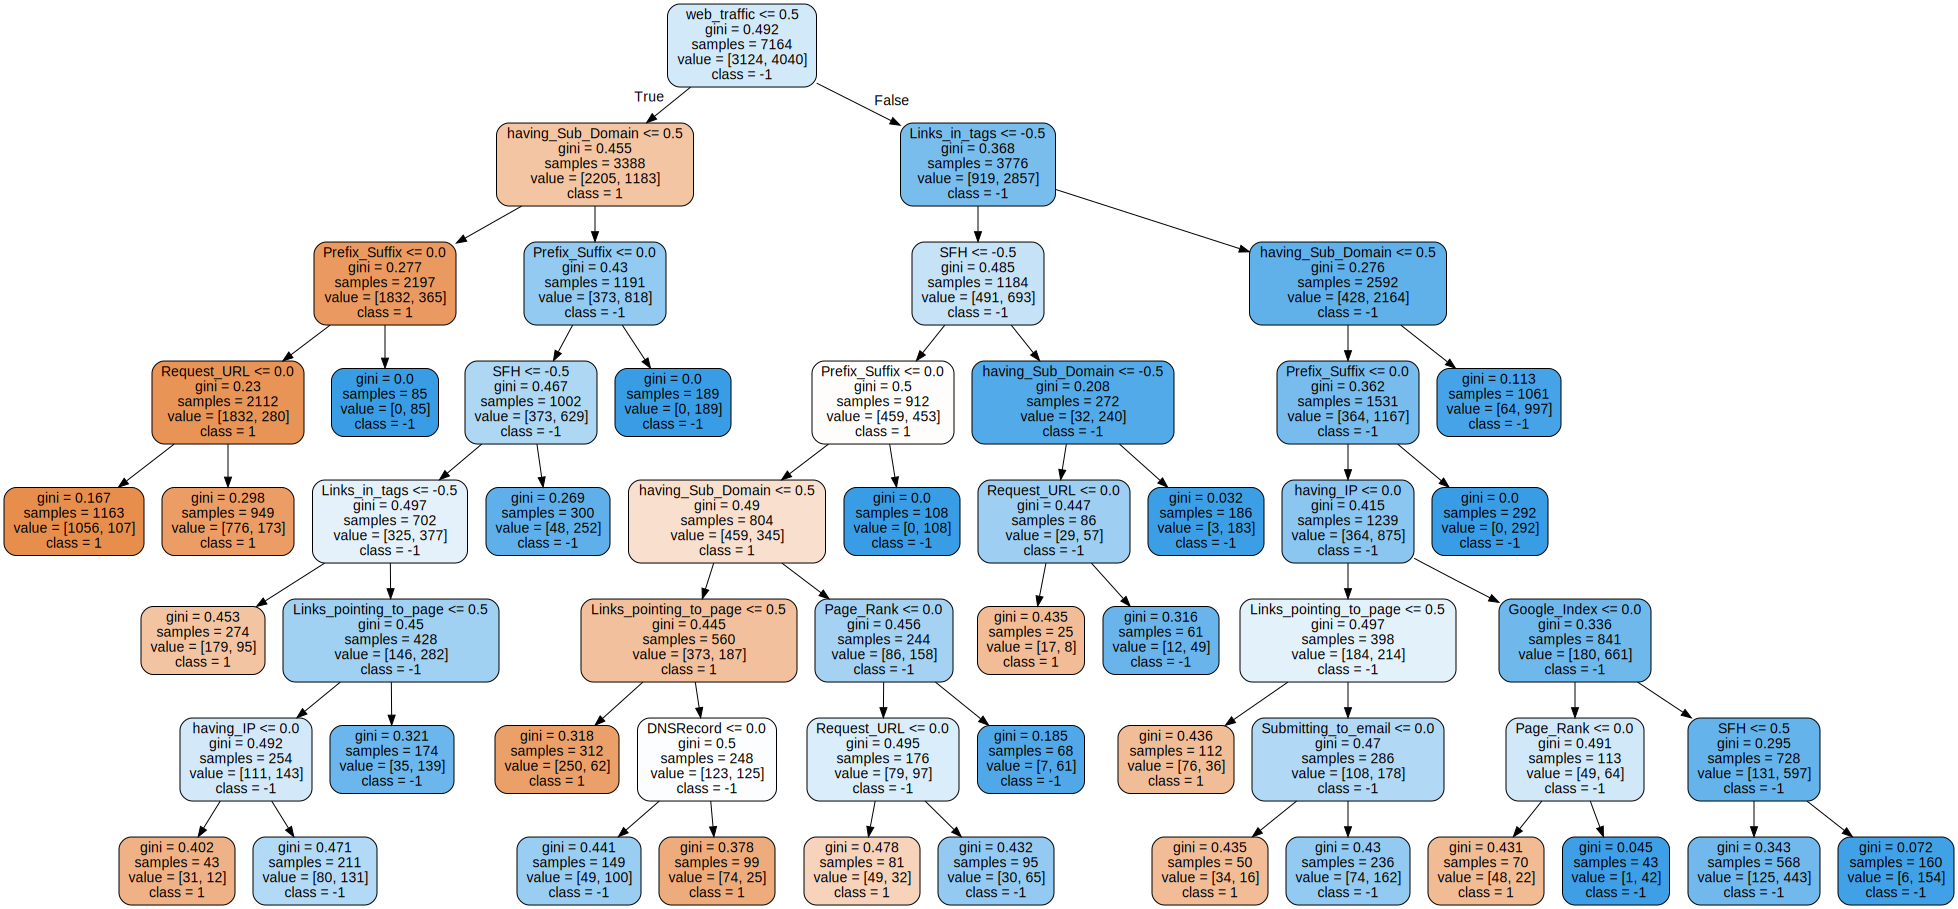

In [69]:
tree_graph=plot_tree(final_dtc, X_train, 'Tree')
tree_graph

# Print DCT the rules

In [70]:
from sklearn.tree import export_text
r = export_text(final_dtc, 
                feature_names=X_train.columns.values.tolist())
print(r)

|--- web_traffic <= 0.50
|   |--- having_Sub_Domain <= 0.50
|   |   |--- Prefix_Suffix <= 0.00
|   |   |   |--- Request_URL <= 0.00
|   |   |   |   |--- class: -1
|   |   |   |--- Request_URL >  0.00
|   |   |   |   |--- class: -1
|   |   |--- Prefix_Suffix >  0.00
|   |   |   |--- class: 1
|   |--- having_Sub_Domain >  0.50
|   |   |--- Prefix_Suffix <= 0.00
|   |   |   |--- SFH <= -0.50
|   |   |   |   |--- Links_in_tags <= -0.50
|   |   |   |   |   |--- class: -1
|   |   |   |   |--- Links_in_tags >  -0.50
|   |   |   |   |   |--- Links_pointing_to_page <= 0.50
|   |   |   |   |   |   |--- having_IP <= 0.00
|   |   |   |   |   |   |   |--- class: -1
|   |   |   |   |   |   |--- having_IP >  0.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Links_pointing_to_page >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- SFH >  -0.50
|   |   |   |   |--- class: 1
|   |   |--- Prefix_Suffix >  0.00
|   |   |   |--- class: 1
|--- web_traffic >  0.50
|   |--- L

# RandomForestClassifier

In [71]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs = -2,
                             random_state = 1)
# Function for training the model
from sklearn.metrics import make_scorer

In [72]:
%%time
base_metrics = fn_compute_model_metrics(rfc, 'base_rfc', 
                       X_train, y_train, X_test, y_test,
                        parameters = None, k = 1)
base_metrics= base_metrics.to_frame()

CPU times: user 767 ms, sys: 237 µs, total: 768 ms
Wall time: 775 ms


In [73]:
%%time

parameters = {"n_estimators" :[100, 150,200]
    ,"min_samples_leaf" : [  3, 5, 10]
    ,"max_features":  [0.5, 'log2', 'sqrt']
    ,"class_weight" : ['balanced_subsample']
}

cv_model = fn_train_model(rfc, X_train, y_train, parameters, k = 5)

print(cv_model)


RandomForestClassifier(class_weight='balanced_subsample', max_features=0.5,
                       min_samples_leaf=3, n_estimators=150, n_jobs=-2,
                       random_state=1)
CPU times: user 2min 6s, sys: 383 ms, total: 2min 7s
Wall time: 2min 6s


In [74]:
parametersBest = {"n_estimators" :[200]
    ,"min_samples_leaf" : [  3]
    ,"max_features":  [ 'sqrt']
    ,"class_weight" : ['balanced_subsample']
}
para_metrics = fn_compute_model_metrics(rfc, 'para_rfc', 
                       X_train, y_train, X_test, y_test,
                       parameters = parametersBest, k = 5)
para_metrics= para_metrics.to_frame()

In [75]:
model_metrics=pd.merge(base_metrics,para_metrics,right_index=True,left_index=True)

In [78]:
%%time
final_rfc= RandomForestClassifier(
    n_estimators=200,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=3,
    min_weight_fraction_leaf=0.0,
    max_features= 'sqrt', #'auto', 0.5
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0, 
    max_samples=None,
)

final_rfc_model = fn_train_model(final_rfc, X_train, y_train)
final_rfc_model_metrics = fn_compute_metrics(cv_model, 'parameters',
                                        X_train, y_train,
                                        X_test, y_test)

print(final_rfc_model)
print(final_rfc_model_metrics)

RandomForestClassifier(max_features='sqrt', min_samples_leaf=3,
                       n_estimators=200, n_jobs=-1)
train_accuracy     0.938023
train_precision    0.962925
train_recall       0.925743
train_f1_score     0.943968
test_accuracy      0.887772
test_precision     0.907503
test_recall        0.888330
test_f1_score      0.897814
Name: parameters, dtype: float64
CPU times: user 1.86 s, sys: 26.3 ms, total: 1.88 s
Wall time: 1.97 s


In [79]:
train_dtc_model_metrics = fn_compute_metrics_train(final_rfc_model,X_test,y_test)
print(train_dtc_model_metrics)


Confusion Matrix :
[[694 103]
 [102 892]]

Report : 
              precision    recall  f1-score   support

          -1       0.87      0.87      0.87       797
           1       0.90      0.90      0.90       994

    accuracy                           0.89      1791
   macro avg       0.88      0.88      0.88      1791
weighted avg       0.89      0.89      0.89      1791

Recall score : 0.8707653701380176
0.8707653701380176


In [80]:
final_rfc_model.feature_importances_

array([0.02894032, 0.01877171, 0.01194821, 0.00852674, 0.00906161,
       0.11363297, 0.16935121, 0.03220425, 0.01073714, 0.00767089,
       0.0108582 , 0.04645689, 0.07490232, 0.0500381 , 0.01219357,
       0.01039846, 0.00873426, 0.01024724, 0.01232893, 0.00628148,
       0.02975861, 0.02486317, 0.20755117, 0.02450678, 0.01693201,
       0.03290098, 0.01020278])

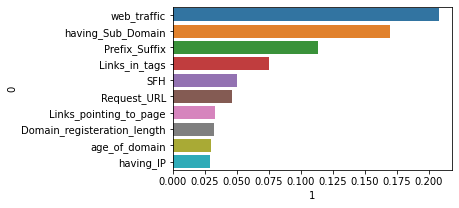

In [81]:
feature_names = list(X_train.columns)
plt.figure(figsize=(5,3))
d = pd.DataFrame([feature_names,final_rfc_model.feature_importances_]).T
d = d.sort_values([1],ascending=False)[0:10]
sns.barplot(d[1],d[0])

In [82]:
d.columns=["variable", "percantage (%)"]
d["percantage (%)"] = d["percantage (%)"] * 100
d

,variable,percantage (%)
22,web_traffic,20.755117
6,having_Sub_Domain,16.935121
5,Prefix_Suffix,11.363297
12,Links_in_tags,7.490232
13,SFH,5.00381
11,Request_URL,4.645689
25,Links_pointing_to_page,3.290098
7,Domain_registeration_length,3.220425
20,age_of_domain,2.975861
0,having_IP,2.894032


In [83]:
pd.set_option('precision', 2)

In [84]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20,16))
d = pd.DataFrame([feature_names,final_rfc_model.feature_importances_]).T
d = d.sort_values([1],ascending=False)[0:]
d*100

,0,1
22,web_trafficweb_trafficweb_trafficweb_trafficwe...,20.76
6,having_Sub_Domainhaving_Sub_Domainhaving_Sub_D...,16.94
5,Prefix_SuffixPrefix_SuffixPrefix_SuffixPrefix_...,11.36
12,Links_in_tagsLinks_in_tagsLinks_in_tagsLinks_i...,7.49
13,SFHSFHSFHSFHSFHSFHSFHSFHSFHSFHSFHSFHSFHSFHSFHS...,5.0
11,Request_URLRequest_URLRequest_URLRequest_URLRe...,4.65
25,Links_pointing_to_pageLinks_pointing_to_pageLi...,3.29
7,Domain_registeration_lengthDomain_registeratio...,3.22
20,age_of_domainage_of_domainage_of_domainage_of_...,2.98
0,having_IPhaving_IPhaving_IPhaving_IPhaving_IPh...,2.89


<Figure size 1440x1152 with 0 Axes>

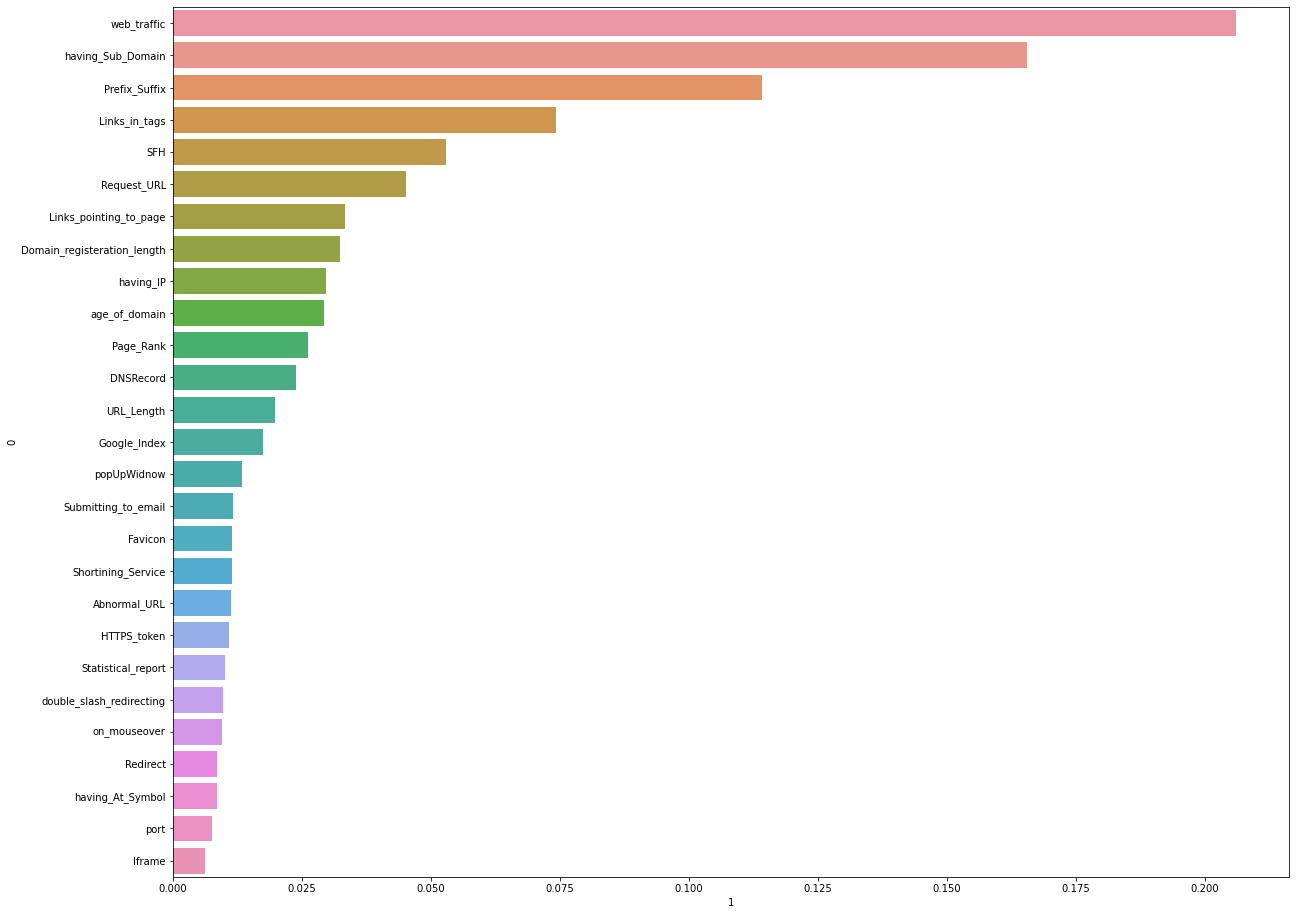

In [ ]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20,16))
d = pd.DataFrame([feature_names,final_rfc_model.feature_importances_]).T
d = d.sort_values([1],ascending=False)[0:]
sns.barplot(d[1],d[0])

In [ ]:
dfMetrics=pd.merge(dfMetrics,model_metrics,right_index=True,left_index=True)
dfMetrics

,base_lrc,para_lrc,base_knn,para_knn,base_svm,para_svm,base_dtc,para_dtc,bg_dtc,para_bgdtc,base_adb,para_adb,base_rfc,para_rfc
train_accuracy,0.8206,0.8170,0.9178,0.9183,0.8204,0.8222,0.9676,0.8308,0.9644,0.9132,0.8321,0.8333,0.9676,0.9238
train_precision,0.8443,0.8616,0.9302,0.9324,0.8440,0.8456,0.9732,0.8355,0.9637,0.9239,0.8474,0.8510,0.9680,0.9519
train_recall,0.8361,0.8047,0.9235,0.9220,0.8359,0.8376,0.9693,0.8715,0.9735,0.9220,0.8564,0.8540,0.9748,0.9109
train_f1_score,0.8402,0.8322,0.9268,0.9272,0.8399,0.8416,0.9712,0.8532,0.9686,0.9229,0.8519,0.8525,0.9714,0.9309
test_accuracy,0.8046,0.8018,0.8621,0.8649,0.8051,0.8074,0.9006,0.8102,0.8989,0.8794,0.8219,0.8241,0.9107,0.8883
test_precision,0.8326,0.8546,0.8769,0.8798,0.8328,0.8356,0.9040,0.8156,0.9029,0.8867,0.8469,0.8518,0.9064,0.9110
test_recall,0.8109,0.7746,0.8742,0.8763,0.8119,0.8129,0.9185,0.8501,0.9165,0.8974,0.8290,0.8270,0.9356,0.8853
test_f1_score,0.8216,0.8127,0.8756,0.8780,0.8222,0.8241,0.9112,0.8325,0.9096,0.8920,0.8378,0.8392,0.9208,0.8980


# Gradient Boosting Machines model.

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()

In [86]:
%%time
base_metrics = fn_compute_model_metrics(gb, 'base_gb', 
                       X_train, y_train, X_test, y_test,
                        parameters = None, k = 1)
base_metrics= base_metrics.to_frame()

CPU times: user 737 ms, sys: 4.68 ms, total: 742 ms
Wall time: 742 ms


In [87]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = { 'learning_rate':[0.1, 0.5, 0.8],
               'n_estimators':[5, 10,15, 20],
               'max_depth':[2, 3, 5, 10],
               'warm_start': [True]
                }

cv_model = fn_train_model(gb,
                          X_train,
                          y_train,
                          parameters,
                          k = 5)
print(cv_model)

GradientBoostingClassifier(learning_rate=0.8, max_depth=10, n_estimators=20,
                           warm_start=True)
CPU times: user 38.6 s, sys: 482 ms, total: 39 s
Wall time: 40.1 s


In [88]:
parametersBest = { 'learning_rate':[0.8],
               'n_estimators':[20],
               'max_depth':[5],
               'warm_start': [True]
                }
para_metrics = fn_compute_model_metrics(gb, 'para_gb', 
                       X_train, y_train, X_test, y_test,
                       parameters = parametersBest, k = 5)
para_metrics= para_metrics.to_frame()

In [89]:
model_metrics=pd.merge(base_metrics,para_metrics,right_index=True,left_index=True)

In [90]:
dfMetrics=pd.merge(dfMetrics,model_metrics,right_index=True,left_index=True)
dfMetrics

,base_lrc,para_lrc,base_knn,para_knn,base_svm,para_svm,base_dtc,para_dtc,bg_dtc,para_bgdtc,base_adb,para_adb,base_gb,para_gb
train_accuracy,0.82,0.82,0.92,0.92,0.82,0.82,0.97,0.83,0.96,0.92,0.83,0.83,0.87,0.92
train_precision,0.84,0.86,0.93,0.92,0.84,0.85,0.97,0.84,0.97,0.93,0.85,0.85,0.88,0.93
train_recall,0.84,0.80,0.92,0.93,0.84,0.84,0.97,0.87,0.97,0.93,0.86,0.85,0.88,0.93
train_f1_score,0.84,0.83,0.93,0.93,0.84,0.84,0.97,0.85,0.97,0.93,0.85,0.85,0.88,0.93
test_accuracy,0.80,0.80,0.86,0.86,0.81,0.81,0.90,0.81,0.91,0.89,0.82,0.82,0.85,0.90
test_precision,0.83,0.85,0.88,0.87,0.83,0.84,0.91,0.82,0.91,0.89,0.85,0.85,0.85,0.91
test_recall,0.81,0.77,0.87,0.88,0.81,0.81,0.92,0.85,0.93,0.91,0.83,0.83,0.87,0.91
test_f1_score,0.82,0.81,0.88,0.88,0.82,0.82,0.91,0.83,0.92,0.90,0.84,0.84,0.86,0.91


# Ensembles: XGBoost

In [91]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [92]:
%%time
base_metrics = fn_compute_model_metrics(xgb, 'base_xgb', 
                       X_train, y_train, X_test, y_test,
                        parameters = None, k = 1)
base_metrics= base_metrics.to_frame()

CPU times: user 649 ms, sys: 13 ms, total: 662 ms
Wall time: 756 ms


In [93]:
%%time
param_grid = {
    "model__n_estimators": [10, 50, 100, 500],
    "model__learning_rate": [0.05, 0.1, 0.5, 1],
}

xgb_cv_model = fn_train_model(xgb,
                          X_train,
                          y_train,
                          param_grid,
                          k = 5)
print(xgb_cv_model)
final_xgb_model_metrics = fn_compute_metrics(xgb_cv_model, 'param_grid',
                                        X_train, y_train,
                                        X_test, y_test)



XGBClassifier(model__learning_rate=0.05, model__n_estimators=10)
CPU times: user 40.3 s, sys: 410 ms, total: 40.7 s
Wall time: 43.2 s


In [94]:
parametersBest = {
    "model__n_estimators": [10],
    'base_score':[0.5],
    'booster':['gbtree'],
    'max_depth':[6],
    'learning_rate':[0.3],
    "model__learning_rate": [0.05],
}

para_metrics = fn_compute_model_metrics(xgb, 'para_xgb', 
                       X_train, y_train, X_test, y_test,
                       parameters = parametersBest, k = 5)
para_metrics= para_metrics.to_frame()

In [95]:
model_metrics=pd.merge(base_metrics,para_metrics,right_index=True,left_index=True)

In [96]:
dfMetrics=pd.merge(dfMetrics,model_metrics,right_index=True,left_index=True)
dfMetrics

,base_lrc,para_lrc,base_knn,para_knn,base_svm,para_svm,base_dtc,para_dtc,bg_dtc,para_bgdtc,base_adb,para_adb,base_gb,para_gb,base_xgb,para_xgb
train_accuracy,0.82,0.82,0.92,0.92,0.82,0.82,0.97,0.83,0.96,0.92,0.83,0.83,0.87,0.92,0.87,0.95
train_precision,0.84,0.86,0.93,0.92,0.84,0.85,0.97,0.84,0.97,0.93,0.85,0.85,0.88,0.93,0.88,0.96
train_recall,0.84,0.80,0.92,0.93,0.84,0.84,0.97,0.87,0.97,0.93,0.86,0.85,0.88,0.93,0.88,0.95
train_f1_score,0.84,0.83,0.93,0.93,0.84,0.84,0.97,0.85,0.97,0.93,0.85,0.85,0.88,0.93,0.88,0.95
test_accuracy,0.80,0.80,0.86,0.86,0.81,0.81,0.90,0.81,0.91,0.89,0.82,0.82,0.85,0.90,0.84,0.91
test_precision,0.83,0.85,0.88,0.87,0.83,0.84,0.91,0.82,0.91,0.89,0.85,0.85,0.85,0.91,0.85,0.92
test_recall,0.81,0.77,0.87,0.88,0.81,0.81,0.92,0.85,0.93,0.91,0.83,0.83,0.87,0.91,0.87,0.92
test_f1_score,0.82,0.81,0.88,0.88,0.82,0.82,0.91,0.83,0.92,0.90,0.84,0.84,0.86,0.91,0.86,0.92


# LightGBM

In [97]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()

In [98]:
%%time
base_metrics = fn_compute_model_metrics(lgbm, 'base_lgbm', 
                       X_train, y_train, X_test, y_test,
                        parameters = None, k = 1)
base_metrics= base_metrics.to_frame()

CPU times: user 321 ms, sys: 11 ms, total: 332 ms
Wall time: 345 ms


In [99]:
param_grid = {
    "n_estimators": [10, 50, 100, 500],
    "learning_rate": [0.05, 0.1, 0.5, 1],
    "n_jobs" :[-1],
                            'random_state' : [2]
}

lgbm_cv_model = fn_train_model(lgbm,
                          X_train,
                          y_train,
                          param_grid,
                          k = 5)
print(lgbm_cv_model)
lgbm_cv_model_metrics = fn_compute_metrics(lgbm_cv_model, 'param_grid',
                                        X_train, y_train,
                                        X_test, y_test)

print(lgbm_cv_model_metrics)

LGBMClassifier(learning_rate=1, random_state=2)
train_accuracy     0.97
train_precision    0.97
train_recall       0.97
train_f1_score     0.97
test_accuracy      0.92
test_precision     0.92
test_recall        0.94
test_f1_score      0.93
Name: param_grid, dtype: float64


In [100]:
param_grid = {
    "n_estimators": [500],
    "learning_rate": [0.05],
    "n_jobs" :[-1],
                            'random_state' : [2]
}


para_metrics = fn_compute_model_metrics(lgbm, 'param_lgbm', 
                       X_train, y_train, X_test, y_test,
                       parameters = param_grid, k = 5)
para_metrics= para_metrics.to_frame()

In [101]:
model_metrics=pd.merge(base_metrics,para_metrics,right_index=True,left_index=True)

In [102]:
dfMetrics=pd.merge(dfMetrics,model_metrics,right_index=True,left_index=True)
dfMetrics

,base_lrc,para_lrc,base_knn,para_knn,base_svm,para_svm,base_dtc,para_dtc,bg_dtc,para_bgdtc,base_adb,para_adb,base_gb,para_gb,base_xgb,para_xgb,base_lgbm,param_lgbm
train_accuracy,0.82,0.82,0.92,0.92,0.82,0.82,0.97,0.83,0.96,0.92,0.83,0.83,0.87,0.92,0.87,0.95,0.92,0.94
train_precision,0.84,0.86,0.93,0.92,0.84,0.85,0.97,0.84,0.97,0.93,0.85,0.85,0.88,0.93,0.88,0.96,0.94,0.95
train_recall,0.84,0.80,0.92,0.93,0.84,0.84,0.97,0.87,0.97,0.93,0.86,0.85,0.88,0.93,0.88,0.95,0.93,0.95
train_f1_score,0.84,0.83,0.93,0.93,0.84,0.84,0.97,0.85,0.97,0.93,0.85,0.85,0.88,0.93,0.88,0.95,0.93,0.95
test_accuracy,0.80,0.80,0.86,0.86,0.81,0.81,0.90,0.81,0.91,0.89,0.82,0.82,0.85,0.90,0.84,0.91,0.90,0.91
test_precision,0.83,0.85,0.88,0.87,0.83,0.84,0.91,0.82,0.91,0.89,0.85,0.85,0.85,0.91,0.85,0.92,0.91,0.92
test_recall,0.81,0.77,0.87,0.88,0.81,0.81,0.92,0.85,0.93,0.91,0.83,0.83,0.87,0.91,0.87,0.92,0.90,0.92
test_f1_score,0.82,0.81,0.88,0.88,0.82,0.82,0.91,0.83,0.92,0.90,0.84,0.84,0.86,0.91,0.86,0.92,0.90,0.92


In [103]:
#dfMetrics.to_excel(folder+u'//'+ "dfMetrics_After2RemovalV4.xlsx")

## Final Model Building

In [108]:
dfMetrics

,base_lrc,para_lrc,base_knn,para_knn,base_svm,para_svm,base_dtc,para_dtc,bg_dtc,para_bgdtc,base_adb,para_adb,base_gb,para_gb,base_xgb,para_xgb,base_lgbm,param_lgbm
train_accuracy,0.82,0.82,0.92,0.92,0.82,0.82,0.97,0.83,0.96,0.92,0.83,0.83,0.87,0.92,0.87,0.95,0.92,0.94
train_precision,0.84,0.86,0.93,0.92,0.84,0.85,0.97,0.84,0.97,0.93,0.85,0.85,0.88,0.93,0.88,0.96,0.94,0.95
train_recall,0.84,0.80,0.92,0.93,0.84,0.84,0.97,0.87,0.97,0.93,0.86,0.85,0.88,0.93,0.88,0.95,0.93,0.95
train_f1_score,0.84,0.83,0.93,0.93,0.84,0.84,0.97,0.85,0.97,0.93,0.85,0.85,0.88,0.93,0.88,0.95,0.93,0.95
test_accuracy,0.80,0.80,0.86,0.86,0.81,0.81,0.90,0.81,0.91,0.89,0.82,0.82,0.85,0.90,0.84,0.91,0.90,0.91
test_precision,0.83,0.85,0.88,0.87,0.83,0.84,0.91,0.82,0.91,0.89,0.85,0.85,0.85,0.91,0.85,0.92,0.91,0.92
test_recall,0.81,0.77,0.87,0.88,0.81,0.81,0.92,0.85,0.93,0.91,0.83,0.83,0.87,0.91,0.87,0.92,0.90,0.92
test_f1_score,0.82,0.81,0.88,0.88,0.82,0.82,0.91,0.83,0.92,0.90,0.84,0.84,0.86,0.91,0.86,0.92,0.90,0.92


XGBoost model I haven Choosen for the prediction due ~(train-test) accuracy very low


In [145]:
df_predict = pd.read_csv('https://raw.githubusercontent.com/hariehkr/techGig/main/data/Phising_Testing_Dataset.csv')
df_predict.index=df_predict['key']
print(df_predict.shape)
df_predict.head(2)

(2100, 31)


,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
key,,,,,,,,,,,,,,,,,,,,,
21338,21338,1,1,1,1,1,1,-1,1,-1,...,1,1,1,1,1,1,1,-1,0,1
21339,21339,1,-1,1,1,1,-1,0,-1,1,...,1,1,1,-1,-1,0,-1,-1,0,1


In [134]:
df_predict.drop(columns=dropCol,inplace=True)
df_predict.shape

(2100, 27)

In [135]:
%%time
param_grid = {
    "model__n_estimators": [10, 50, 100, 500],
    "model__learning_rate": [0.05, 0.1, 0.5, 1],
}

xgb_cv_model = fn_train_model(xgb,
                          X_train,
                          y_train,
                          param_grid,
                          k = 5)
print(xgb_cv_model)

XGBClassifier(model__learning_rate=0.05, model__n_estimators=10)
CPU times: user 38.4 s, sys: 144 ms, total: 38.6 s
Wall time: 38.9 s


In [136]:
xgb_cv_train  = fn_compute_metrics_train(xgb_cv_model, 
                             X_train_all,
                             y_train_all)


Confusion Matrix :
[[3285  636]
 [ 607 4427]]

Report : 
              precision    recall  f1-score   support

          -1       0.84      0.84      0.84      3921
           1       0.87      0.88      0.88      5034

    accuracy                           0.86      8955
   macro avg       0.86      0.86      0.86      8955
weighted avg       0.86      0.86      0.86      8955

Recall score : 0.837796480489671


In [137]:
train_predictions = xgb_cv_model.predict(X_train_all)

In [138]:
metrics = {}
# train metrics
metrics['train_accuracy']    = round(accuracy_score(y_train_all, train_predictions),4)
metrics['train_precision']   = round(precision_score(y_train_all, train_predictions),4)
metrics['train_recall']      = round(recall_score(y_train_all, train_predictions),4)
metrics['train_f1_score']    = round(f1_score(y_train_all, train_predictions),4)
print(metrics)

{'train_accuracy': 0.8612, 'train_precision': 0.8744, 'train_recall': 0.8794, 'train_f1_score': 0.8769}


In [139]:
test_pred = xgb_cv_model.predict(df_predict)

In [140]:
test_pred[0:10]

array([ 1, -1, -1, -1,  1,  1,  1,  1,  1, -1])

In [147]:
submissions_df = pd.DataFrame({'key': df_predict.key, 'Result': test_pred})
submissions_df.head()

,key,Result
key,,
21338,21338,1
21339,21339,-1
21340,21340,-1
21341,21341,-1
21342,21342,1


In [148]:
submissions_df['Result'].value_counts()

 1    1159
-1     941
Name: Result, dtype: int64

In [ ]:
#submissions_df.to_csv(folder+u'//'+ "test_predictions_25thJulyV4_XgB.csv", index=None)